<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:

import glob
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import files
import os
     

In [73]:
file2 = "/content/GAMES.zip"


In [74]:
with ZipFile(file2, 'r') as zip:
    zip.printdir()
    zip.extractall()
     

File Name                                             Modified             Size
GAMES/                                         2022-12-07 22:59:44            0
GAMES/GAME1/                                   2022-12-07 23:00:00            0
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (1...e7-e5).jpg 2022-12-07 13:32:26        72733
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (1.e2-e4).jpg 2022-12-07 13:42:38        72653
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (10...Bf8xd6).jpg 2022-12-07 13:34:16        67733
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (10.e5xd6).jpg 2022-12-07 13:34:10        68634
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (11...Bc8-f5).jpg 2022-12-07 13:34:24        67088
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (11.Qd1xd4).jpg 2022-12-07 13:34:20        67050
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (12...0-0-0).jpg 2022-12-07 13:34:34        66860
GAMES/GAME1/Bird Henry Edward - Anderssen Adolf (12.Nb1-c3).jpg 2022-12-07 13:3

In [75]:
paths = os.listdir('GAMES')
paths
     

['GAME1',
 'GAME7',
 'GAME4',
 'GAME11',
 'GAME15',
 'GAME2',
 'GAME13',
 'GAME9',
 'GAME10',
 'GAME3',
 'GAME5',
 'GAME6',
 'GAME12',
 'GAME14',
 'GAME8']

In [76]:
k=[]
images = []
labels = []
m=[] 
a=[] 

In [77]:
for i in paths:
    path0 = '/content/GAMES/'+ str(i)
    for path in os.listdir(path0):
        path = '/content/GAMES/'+ str(i) + "/" + path
        #print(path)
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(64,64),interpolation= cv2.INTER_AREA)
        img = img/255.0
        images.append(img)
        label = path.split("(")
        m.append(label)

In [78]:
len(m)

1133

In [79]:
for y in range(int(len(m))):
    label1=m[y][1][:2]
    labels.append(int(label1.split(".")[0]))
       

In [80]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels=le.fit_transform(labels)
labels

array([ 0, 11, 19, ..., 10,  4, 19])

In [81]:
labels10 = np.array(labels)
images10 = np.array(images).astype("float32")

In [82]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Sequential

In [89]:
y=labels10
y = to_categorical(y)
X=images10

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [96]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(64,64,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='softmax'))
model.compile(optimizer = "adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [97]:
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
29/29 [==============================] - 17s 567ms/step - loss: 4.2800 - accuracy: 0.0199 - val_loss: 4.1204 - val_accuracy: 0.0573
Epoch 2/100
29/29 [==============================] - 15s 521ms/step - loss: 4.0899 - accuracy: 0.0287 - val_loss: 3.9862 - val_accuracy: 0.0264
Epoch 3/100
29/29 [==============================] - 15s 517ms/step - loss: 3.9956 - accuracy: 0.0375 - val_loss: 3.8595 - val_accuracy: 0.0220
Epoch 4/100
29/29 [==============================] - 18s 631ms/step - loss: 3.7773 - accuracy: 0.0497 - val_loss: 3.6650 - val_accuracy: 0.0793
Epoch 5/100
29/29 [==============================] - 15s 516ms/step - loss: 3.6015 - accuracy: 0.0695 - val_loss: 3.4889 - val_accuracy: 0.0749
Epoch 6/100
29/29 [==============================] - 15s 519ms/step - loss: 3.4560 - accuracy: 0.0773 - val_loss: 3.4099 - val_accuracy: 0.0749
Epoch 7/100
29/29 [==============================] - 15s 517ms/step - loss: 3.3362 - accuracy: 0.0872 - val_loss: 3.3468 - val_accuracy:

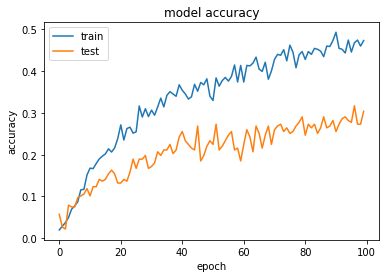

In [99]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

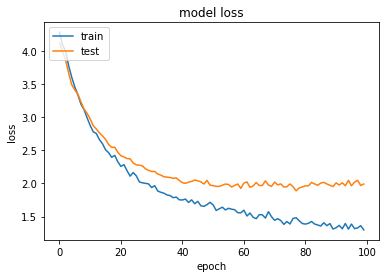

In [100]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()